# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [54]:
# Libraries
import numpy as np
import pandas as pd
import pylab as plt
plt.rcParams['figure.figsize'] = (12,4)
# Your Code Here

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [13]:
# your code here
fitbit = pd.read_csv('../data/Fitbit2.csv')
pd.options.display.max_columns = None
fitbit.columns = [i.lower().replace(' ', '_') for i in fitbit.columns]
fitbit.head()

,date,calorie_burned,steps,distance,floors,minutes_sedentary,minutes_lightly_active,minutes_fairly_active,minutes_very_active,activity_calories,minutesofsleep,minutesofbeingawake,numberofawakings,lengthofrestinminutes,distance_miles,days,days_encoded,work_or_weekend,hours_sleep,sleep_efficiency,yesterday_sleep,yesterday_sleep_efficiency,months,months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [14]:
fitbit.describe().T

,count,mean,std,min,25%,50%,75%,max
calorie_burned,367.0,2741.501362,916.307036,179.000,2698.000000,2974.000000,3233.000000,4351.000000
steps,367.0,10121.588556,5594.836225,0.000,6730.500000,10413.000000,13916.500000,26444.000000
distance,367.0,8.549128,3.409881,0.000,6.155000,8.290000,10.560000,20.450000
floors,367.0,11.724796,10.337370,0.000,5.000000,11.000000,16.000000,101.000000
minutes_sedentary,367.0,563.934482,294.793145,1.002,520.000000,663.000000,756.500000,998.000000
minutes_lightly_active,367.0,236.405995,86.531376,0.000,179.000000,226.000000,290.000000,472.000000
minutes_fairly_active,367.0,26.163488,20.319456,0.000,8.000000,24.000000,41.500000,101.000000
minutes_very_active,367.0,35.722071,31.006682,0.000,10.500000,29.000000,54.000000,153.000000
activity_calories,367.0,2044.147139,2041.267168,0.000,1218.500000,1553.000000,1927.500000,9830.000000
minutesofsleep,367.0,290.479564,154.752328,0.000,224.000000,337.000000,400.500000,553.000000


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Work_or_Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [72]:
import matplotlib.pyplot as plt
import os


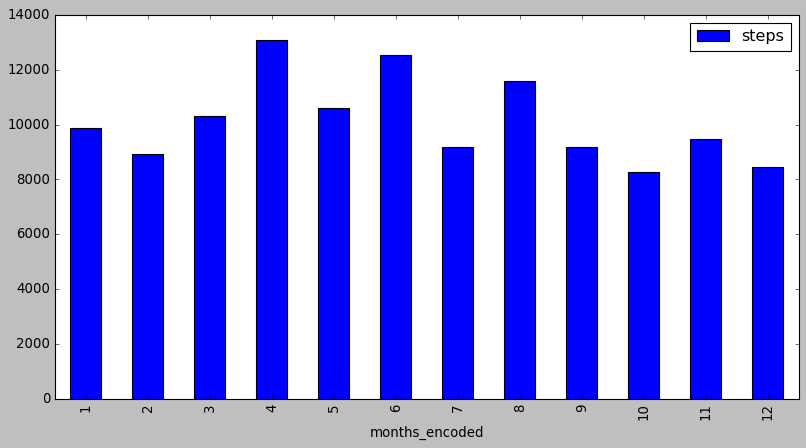

In [75]:
# AVERAGE STEPS BY MONTH_ENCODED
# your code here
fitbit.groupby(['months_encoded']).agg({'steps': 'mean'}).plot(kind='bar');
try:
    os.mkdir('../figures')
except:
    pass
plt.savefig('../figures/average_steps_by_month_encoded.png')

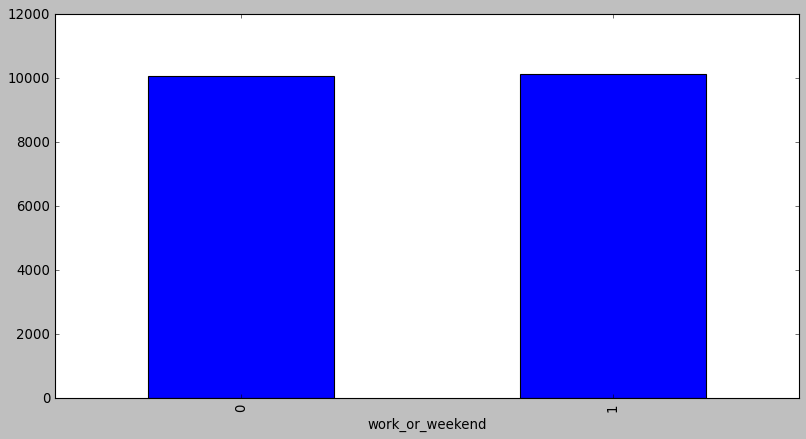

In [76]:
# AVERAGE STEPS BY WORK_OR_WEEKEND
# your code here
fitbit.groupby(['work_or_weekend']).mean().steps.plot(kind='bar');
plt.savefig('../figures/average_steps_by_work_or_weekend.png')

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

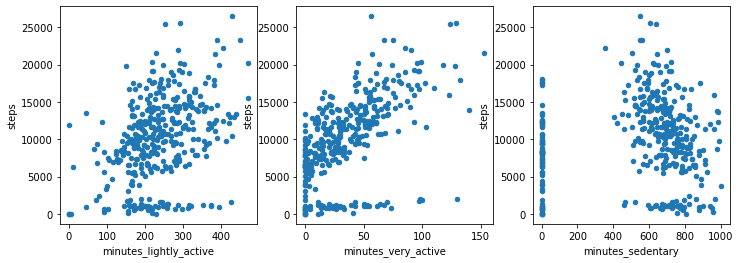

In [55]:
# your code here

fig, ax = plt.subplots(1, 3)

for i,e in enumerate(['minutes_lightly_active', 'minutes_very_active', 'minutes_sedentary']):
    fitbit.plot(ax=ax[i], x=e, y='steps', kind='scatter')

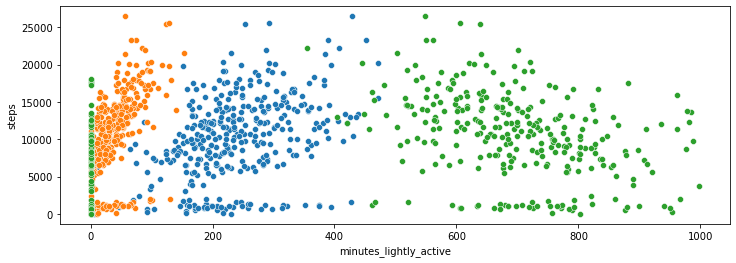

In [56]:
# your code here
import seaborn as sns


for e in ['minutes_lightly_active', 'minutes_very_active', 'minutes_sedentary']:
    sns.scatterplot(data=fitbit, x=e, y='steps');

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [57]:
# your code here
titanic = pd.read_csv('../data/titanic.csv')
titanic.columns = [i.lower().replace(' ', '_') for i in titanic.columns]
titanic.head()

,passengerid,survived,pclass,name,gender,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [58]:
# your code here
titanic.dtypes

passengerid      int64
survived       float64
pclass           int64
name            object
gender          object
age            float64
sibsp            int64
parch            int64
ticket          object
fare           float64
cabin           object
embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [66]:
# NUMERICAL VARIABLES
# your code here

titanic.select_dtypes(include=['int64','float64']).head()

,passengerid,survived,pclass,age,sibsp,parch,fare
0,1,0.0,3,22.0,1,0,7.2500
1,2,1.0,1,38.0,1,0,71.2833
2,3,1.0,3,26.0,0,0,7.9250
3,4,1.0,1,35.0,1,0,53.1000
4,5,0.0,3,35.0,0,0,8.0500


In [65]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(include=['object']).head()

,name,gender,ticket,cabin,embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [67]:
# your code here
plt.style.use('classic')
plt.rcParams['figure.figsize'] = (12,6)

#### Use the right visulalization to show the distribution of column `Age`.

In [68]:
# your code here
titanic.age.mode()

0    24.0
Name: age, dtype: float64

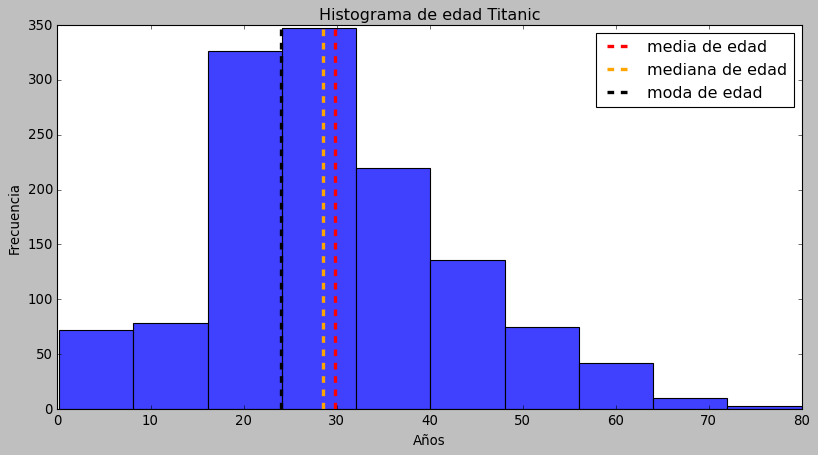

In [69]:
sns.histplot(x=titanic.age, bins=10)   # bins=nº de barras
plt.axvline(titanic.age.mean(),
            c='r',
            linewidth=3.,
            linestyle='--',
            label='media de edad')

plt.axvline(titanic.age.median(),
            c='orange',
            linewidth=3.,
            linestyle='--',
            label='mediana de edad')

plt.axvline(24,
            c='black',
            linewidth=3.,
            linestyle='--',
            label='moda de edad')

plt.title('Histograma de edad Titanic')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
#plt.savefig('histograma.png')
plt.show();

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

In [100]:
max(titanic.age)

80.0

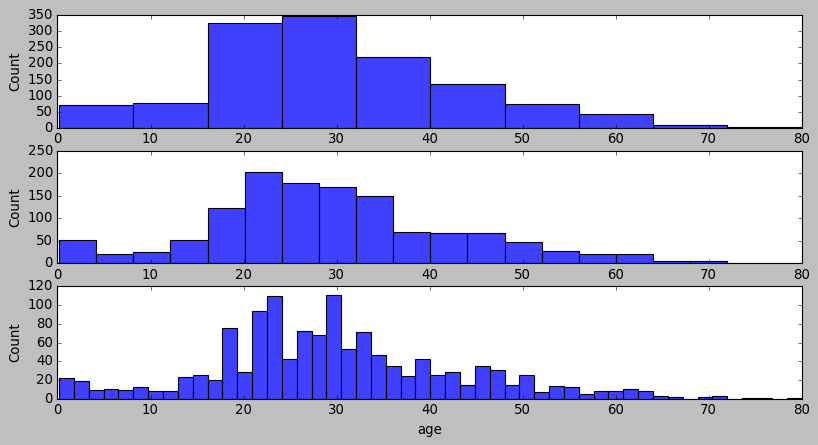

In [102]:
# your code here
import seaborn as sns
fig, ax = plt.subplots(3, 1)

for i,e in enumerate([10,20,50]):
    sns.histplot(x=titanic.age, bins=e, ax=ax[i])

#### How does the bin size affect your plot?

In [ ]:
"""
Cuantas menos particiones tenga el histograma, menos informacion podemos obtener sobre
ella pues en cada particion encontramos el total de personas acotados en esa edad.

lo idilico seria tener tantas bins como rango de valores tenga la columna.
"""

#### Use seaborn to show the distribution of column `Age`.

/Users/principal/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


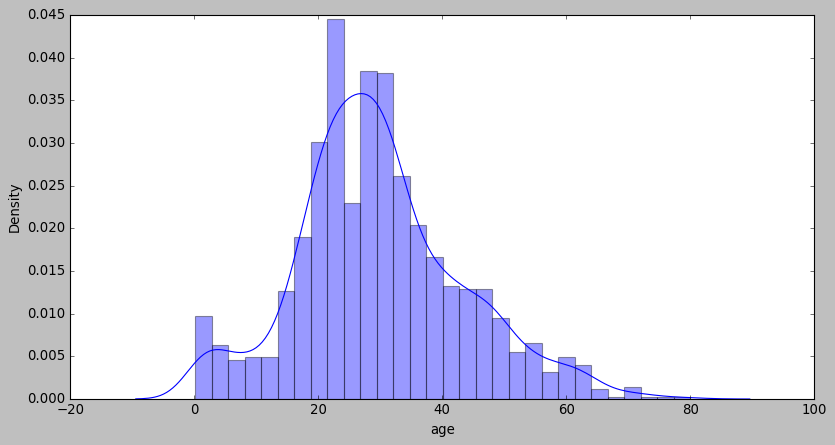

In [103]:
# your code here
sns.distplot(titanic.age);

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

<AxesSubplot:>

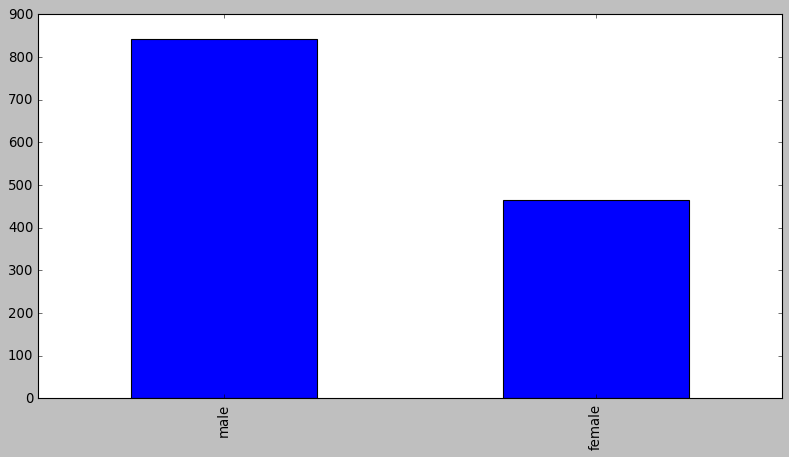

In [116]:
# Method 1 - matplotlib
# your code here
titanic.gender.value_counts().plot(kind='bar')


<AxesSubplot:xlabel='gender', ylabel='count'>

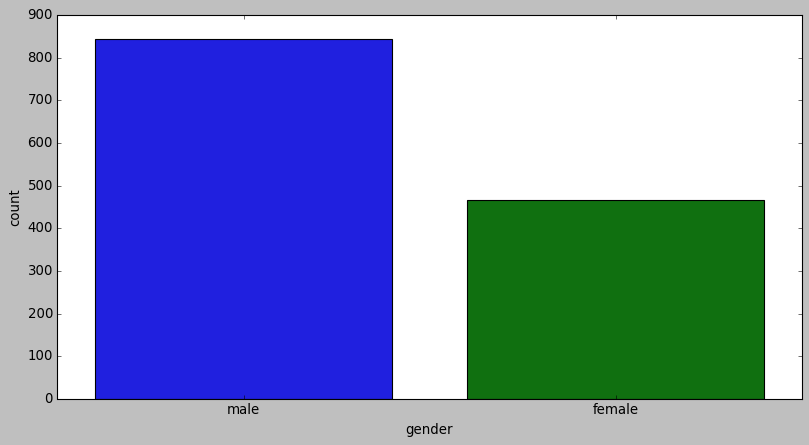

In [109]:
# Method 2 - seaborn
# your code here

sns.countplot(x=titanic.gender)

#### Use the right plot to visualize the column `Pclass`.

<AxesSubplot:xlabel='pclass', ylabel='count'>

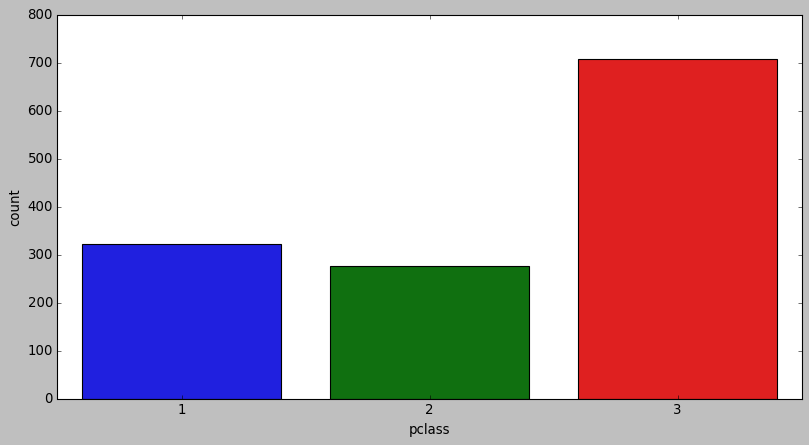

In [117]:
# your code here
sns.countplot(x=titanic.pclass)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

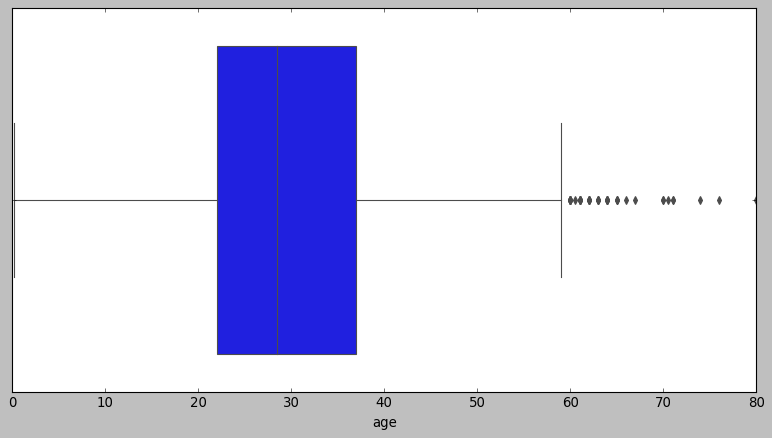

In [124]:
# your code here
sns.boxplot(x=titanic.age);

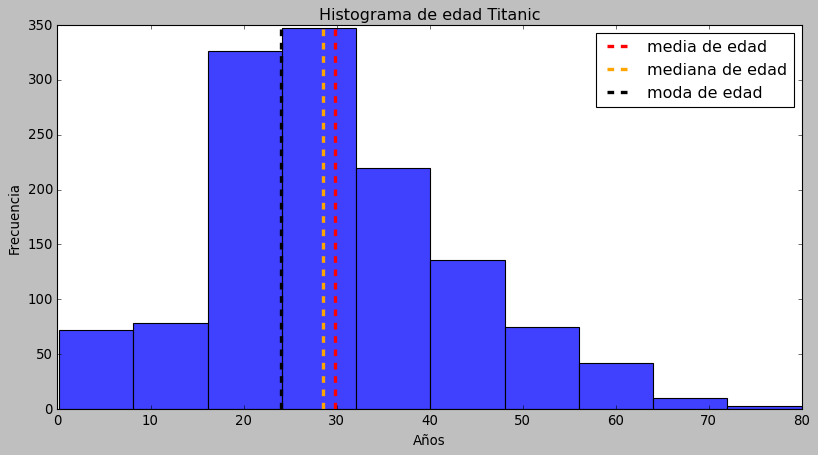

In [125]:
sns.histplot(x=titanic.age, bins=10)   # bins=nº de barras
plt.axvline(titanic.age.mean(),c='r',linewidth=3.,linestyle='--',label='media de edad')
plt.axvline(titanic.age.median(),c='orange',linewidth=3.,linestyle='--',label='mediana de edad')
plt.axvline(24,c='black',linewidth=3.,linestyle='--',label='moda de edad')
plt.title('Histograma de edad Titanic')
plt.xlabel('Años')
plt.ylabel('Frecuencia')
plt.legend()
#plt.savefig('histograma.png')
plt.show();

In [130]:
titanic.age.describe()

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: age, dtype: float64

In [ ]:
"""
el boxplot nos muestra toda la informacion descriptiva necesaria 
"""

#### What does the last plot tell you about the feature `Age`?

In [131]:
"""
existen varios outliers segund el test de tukey, y el 50% de las muestras se encuentran entre
los 22 y 37 años
"""

'\nexisten varios outliers segund el test de tukey, y el 50% de las muestras se encuentran entre\nlos 22 y 37 años\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

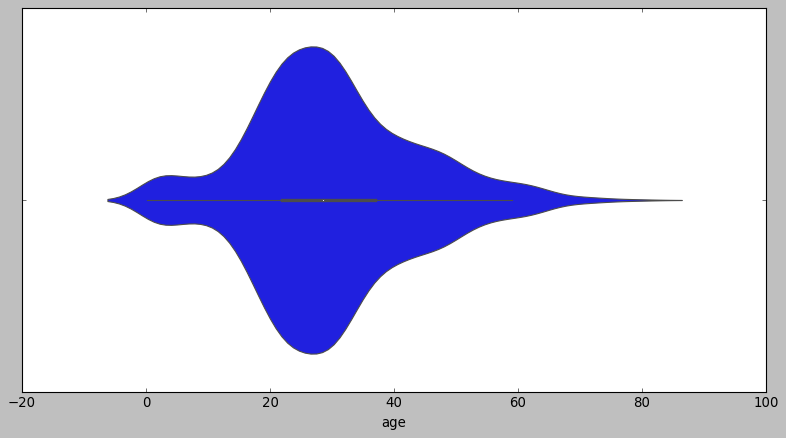

In [132]:
# your code here
sns.violinplot(x=titanic.age);

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
nos muestra como estan distribuidos los valores
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

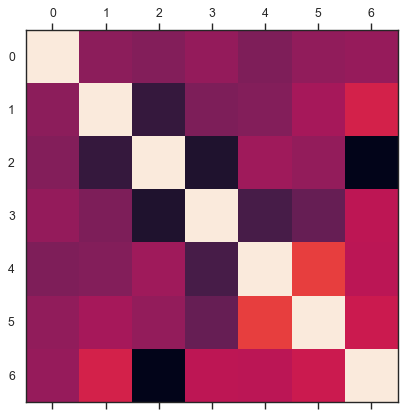

In [136]:
# Method 1 - matplotlib
# your code here
plt.matshow(titanic.corr())

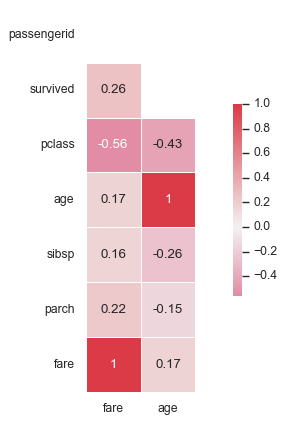

In [140]:
# Method 2 - seaborn
# your code here
corr=titanic.corr(method='pearson')
sns.set(style='white')     # estilo blanco
mascara=np.triu(np.ones_like(corr[['fare', 'age']], dtype=bool))   # genera una mascara para tapar valores
cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores
sns.heatmap(corr[['fare', 'age']],mask=mascara,cmap=cmap,vmax=1,center=0,square=True,linewidth=0.5,cbar_kws={'shrink': 0.5},
            annot=True
           );

#### Plot the correlation matrix using seaborn.

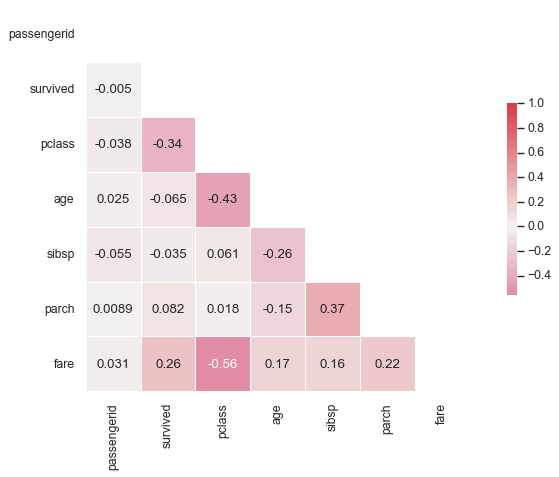

In [141]:
# your code here
corr=titanic.corr(method='pearson')
sns.set(style='white')     # estilo blanco
mascara=np.triu(np.ones_like(corr, dtype=bool))   # genera una mascara para tapar valores
cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de colores
sns.heatmap(corr,mask=mascara,cmap=cmap,vmax=1,center=0,square=True,linewidth=0.5,cbar_kws={'shrink': 0.5},
            annot=True
           );

#### What are the most correlated features?

In [142]:
"""
fare - pclass
"""

'\nfare - pclass\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

<AxesSubplot:xlabel='pclass'>

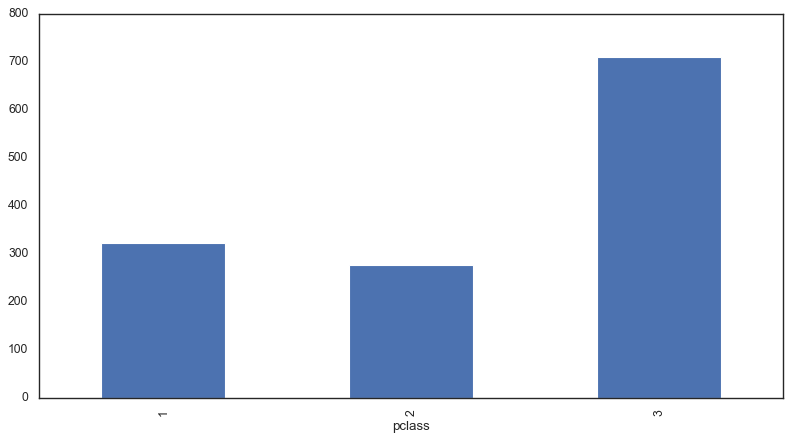

In [144]:
# your code here
titanic.groupby('pclass').age.count().plot(kind='bar')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

In [ ]:
# your code here